In [1]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from drn_interactions.plots import heatmap, PAL_GREY_BLACK
from drn_interactions.config import Config
from drn_interactions.io import load_derived_generic, load_neurons
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from drn_interactions.transforms import SpikesHandler
from drn_interactions.io import load_neurons, load_derived_generic
import matplotlib.pyplot as plt
from drn_interactions.stats import prop_of_total
import numpy as np
from drn_interactions.spiketrains.plots import NeuronPropsPlotter
from drn_interactions.stats import prop_of_total
from drn_interactions.spiketrains.plots import (
    NeuronTypesFigureLoader,
    NeuronTypesFigurePreprocessor,
)
from drn_interactions.spiketrains.waveforms import WaveformPreprocessor

import numpy as np

sns.set_theme(style="ticks", context="paper")

%load_ext autoreload
%autoreload 2

In [2]:

loader = NeuronTypesFigureLoader(
    example_session_name="hamilton_35", 
    example_session_t_start=110,
    )
(
    probe_neuron_types,
    probe_waveforms,
    probe_waveform_props,
    probe_spiketrain_props,
    single_unit_props,
    single_unit_neuron_types,
    spikes,
) = loader.load_all()

preprocessor = NeuronTypesFigurePreprocessor(
    waveform_preprocessor=WaveformPreprocessor(gaussian_sigma=1, medfilter_size=3),
)
df_props, waveforms, trains = preprocessor.preprocess_all(
    probe_neuron_types,
    probe_waveforms,
    probe_waveform_props,
    probe_spiketrain_props,
    single_unit_props,
    single_unit_neuron_types,
    spikes
)
display(df_props.sample(3))

,ID,Neuron Type,Metric,Value
1012,2424,FF,CV(ISI),0.214210
1581,2431,SR,Spike Rate (Hz),6.269463
474,2469,SIR,Waveform Width (ms),1.688101


{'hspace': 0.05, 'left': 0.1, 'right': 0.95, 'top': 0.9, 'bottom': 0}


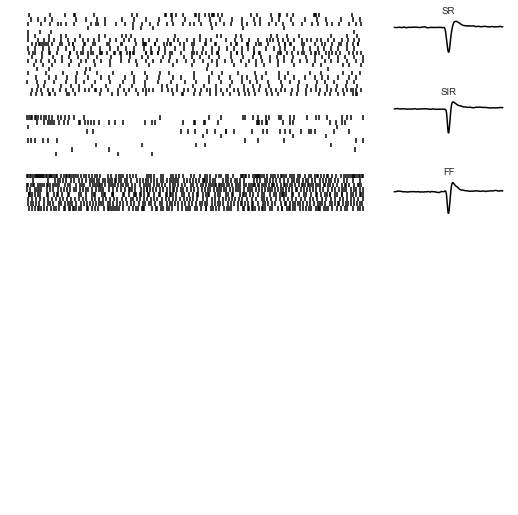

In [47]:
from drn_interactions.spiketrains.plots import NeuronTypesFigureGridMaker
from drn_interactions.spiketrains.plots import NeuronTypesPlotter

grid_maker = NeuronTypesFigureGridMaker()
plotter = NeuronTypesPlotter()

fig = grid_maker.make_figure(figsize=(7, 7))
fig_top, fig_bottom = grid_maker.split_top_bottom(fig)


fig_raster, fig_waveforms = grid_maker.split_top_figs(fig_top)

plotter.plot_raster(
    fig=fig_raster, 
    trains=trains,
    height_ratios=[len(x) + 3 for x in trains.values()],
    grid_spec_kwargs=dict(hspace=0.05, left=0.1, right=0.95)
    )


axes_waves = plotter.plot_waveforms(
    fig=fig_waveforms,
    waveforms=waveforms,
    grid_spec_kwargs=dict(hspace=0.2, left=0.2, right=0.7, top=0.4, bottom=0.15, wspace=0),
)
for nt, ax in axes_waves.items():
    ax.set_title(nt)


fig_heats, fig_bar, fig_pct = grid_maker.split_bottom_figs(fig_bottom)


plt.show()



In [29]:
[len(x) for x in trains.values()] 

[21, 10, 7]

In [ ]:
# def preprocess(
#     df_probe_spiketrain_stats,
#     df_probe_waveform_stats,
#     df_probe_neuron_types,
#     df_single_unit_stats,
#     df_single_unit_neuron_types,
#     electrode_type_order=("Silicon Probe", "Glass Pipette"),
#     neuron_type_order=("SR", "SIR", "FF"),
#     ):
#     df_probe = (
#         df_probe_spiketrain_stats
#         .merge(df_probe_waveform_stats, how="outer")
#         .merge(df_probe_neuron_types)
#         .assign(width_basepost=lambda x: x.width_basepost.divide(30))
#         .rename(columns={
#             "width_basepost": "Waveform Width (ms)", 
#             "cv_isi_burst": "CV(ISI)", 
#             "mean_firing_rate": "Spike Rate (Hz)",
#             "neuron_type": "Neuron Type",
#             })
#         .assign(**{"Electrode Type": "Silicon Probe"})
#         .melt(
#             id_vars=["neuron_id", "Electrode Type", "Neuron Type"], 
#             value_vars=["CV(ISI)", "Spike Rate (Hz)", "Waveform Width (ms)"],
#             var_name="Metric",
#             value_name="Value"
#         )
#     )
#     df_single_unit = (
#         df_single_unit_stats
#         .merge(df_single_unit_neuron_types)
#         .assign(id=lambda x: x.id + 600000)
#         .rename(columns={
#             "id": "neuron_id",
#             "cv-isi": "CV(ISI)",
#             "firing_rate": "Spike Rate (Hz)",
#             "to_baseline": "Waveform Width (ms)",
#             "neuron_type": "Neuron Type",
#             })
#         .assign(**{"Electrode Type": "Glass Pipette"})
#         .melt(
#             id_vars=["neuron_id", "Electrode Type", "Neuron Type"], 
#             value_vars=["CV(ISI)", "Spike Rate (Hz)", "Waveform Width (ms)"],
#             var_name="Metric",
#             value_name="Value")
#     )
#     df = pd.concat([df_probe, df_single_unit]).reset_index(drop=True)
#     df["Electrode Type"] = pd.Categorical(df["Electrode Type"], electrode_type_order, ordered=True)
#     df["Neuron Type"] = pd.Categorical(df["Neuron Type"], neuron_type_order, ordered=True)
#     return df


In [ ]:
from drn_interactions.io import load_waveforms

df_meta = load_derived_generic("neuron_types.csv")
good_neurons = load_derived_generic("waveform_summary.csv")[["neuron_id", "width_basepost"]].dropna().neuron_id.unique()
df_meta = df_meta.loc[lambda x: x.neuron_id.isin(good_neurons)]

waveforms = load_waveforms()[["neuron_id", "waveform_index", "waveform_value"]]
session_name = "hamilton_35"

f = plt.figure(figsize=(7, 7), constrained_layout=True)

f_top, f_bottom = f.subfigures(nrows=2, height_ratios=[1, 1], hspace=0.3)

f_raster, f_waveforms = f_top.subfigures(
    ncols=2,
    nrows=1, 
    width_ratios=[0.9, 0.3],
    wspace=0
)

plot_raster(
    f_raster,
    df_neuron_types=df_meta,
    session_name=session_name,
    gs_kwargs=dict(left=0.05, right=1, bottom=0.1, top=0.9),
    t_start=131,
)

plot_waveforms(
    f=f_waveforms, 
    df_neuron_types=df_meta, 
    df_waveforms=waveforms, 
    session_name=session_name,
    idx_to_choose=2,
    )

f_heat, f_bar, f_prop = f_bottom.subfigures(
    ncols=3, 
    width_ratios=[0.5, 0.4, 0.2],
    wspace=0.2
    )

plot_heats(f_heat, df)

plot_props(f_bar, df)

plot_pct(f_prop, df)

plt.savefig("test.png", dpi=300)

In [4]:
df = preprocess(
    df_probe_spiketrain_stats=load_derived_generic("spiketrain_stats_segments.csv"),
    df_probe_waveform_stats=load_derived_generic("waveform_summary.csv"),
    df_probe_neuron_types=load_derived_generic("neuron_types.csv"),
    df_single_unit_stats=load_derived_generic("single_unit_dataset_tidied.csv"),
    df_single_unit_neuron_types=load_derived_generic("neuron_types_single_unit.csv"),
    )
display(df.sample(3))

,neuron_id,Electrode Type,Neuron Type,Metric,Value
1132,1,Silicon Probe,SIR,Waveform Width (ms),0.917891
2064,600106,Glass Pipette,SIR,Waveform Width (ms),2.000000
500,2544,Silicon Probe,SIR,CV(ISI),0.867159


In [448]:
def plot_heats(f, df):
    axes = f.subplot_mosaic(
    [
        ["h1", "h2", "c",],
        ["h1", "h2", ".",],    
    ],
    gridspec_kw=dict(
        width_ratios=[1, 1, 0.1], 
        wspace=0.5, 
        top=0.65,
        bottom=0.35,
        right=0.8
        ),
    )  
    plotter.neuron_type_heat(
        df=df.query("`Electrode Type` == 'Silicon Probe'"),
        ax=axes["h1"], vmin=-1, vmax=1, cmap="coolwarm", plot_cbar=False
    )
    axes["h1"].set_title("Silicon\nProbe")
    axes["h1"].set_ylabel("Neuron ID")
    axes["h1"].tick_params(axis="x", length=0)
    plotter.neuron_type_heat(
        df=df.query("`Electrode Type` == 'Glass Pipette'"),
        ax=axes["h2"], vmin=-1, vmax=1, cmap="coolwarm", plot_cbar=True,
        cbar_ax=axes["c"], 
    )
    axes["h2"].set_title("Glass\nPipette")
    axes["h2"].tick_params(axis="x", length=0)
    
    return f, axes

def draw_barplot(df, ax, neuron_type_order=("SR", "SIR", "FF")):
    sns.barplot(
        data=df, 
        x="Neuron Type", 
        y="Value", 
        ax=ax, 
        color="grey", 
        capsize=0.15, 
        errwidth=1.2, 
        edgecolor="black", 
        errcolor="black", 
        alpha=1, 
        linewidth=1,
        order=neuron_type_order
        )
    return ax




def plot_props(f, df, label_size="small", despine=True):
    ax_boxes = f.subplot_mosaic(
    mosaic=[
        ["p1", "s1"],
        ["p2", "s2"],
        ["p3", "s3"],
    ],
    sharex=True,
    sharey=False,
    gridspec_kw=dict(
    wspace=0.4,
    hspace=0.4, 
    top=0.9,
    bottom=0.1,
    right=0.8,
        )
    )
    electrode_types = df["Electrode Type"].value_counts().index.values.tolist()
    metrics = df["Metric"].value_counts().index.values.tolist()

    mosaic_labs = ["p", "s"]
    metric_labs = metrics[:]
    metric_labs[1] = "Rate\n(Hz)"
    metric_labs[-1] = "Width\n(ms)"
    electrode_labs = ["Silicon\nProbe", "Glass\nPipette"]
    ylims = [(0, 1.6), (0, 13), (0, 2.2)]

    for col_idx, (electrode_type, electrode_lab) in enumerate(zip(electrode_types, electrode_labs)):

        for row_idx, (metric_type, metric_lab) in enumerate(zip(metrics, metric_labs)):
            letter = mosaic_labs[col_idx]
            y_min, y_max = ylims[row_idx]
            number = str(row_idx + 1)
            ax = ax_boxes[f"{letter}{number}"]
            df_ = df.query(f"`Electrode Type` == '{electrode_type}' and `Metric` == '{metric_type}'")
            draw_barplot(df_, ax, neuron_type_order=("SR", "SIR", "FF"))
            if col_idx == 0:
                ax.set_ylabel(metric_lab, fontsize=label_size)
            else:
                ax.set_ylabel("")
            if row_idx == 0:
                ax.set_title(electrode_lab, fontsize=label_size)
            ax.set_ylim(y_min, y_max)
            ax.tick_params(width=0.2, length=2, labelsize=label_size)
            ax.set_xlabel("")
            if despine:
                sns.despine(ax=ax)

    f.align_ylabels()
    return f, ax_boxes

def plot_pct(f, df, neuron_type_order=("SR", "SIR", "FF"), electrode_type_order=("Silicon Probe", "Glass Pipette")):
    ax = f.subplots(
        gridspec_kw=dict(top=0.6, bottom=0.3, left=0.3, right=0.8),

        )

    ax = (
        df["Neuron Type"]
        .groupby(df["Electrode Type"])
        .value_counts(normalize=True)
        .rename("% Total Neurons")
        .multiply(100)
        .reset_index()
        .pipe(
            (sns.barplot, "data"), 
            x="level_1", y="% Total Neurons", 
            hue="Electrode Type", 
            hue_order=electrode_type_order,
            palette=PAL_GREY_BLACK, 
            edgecolor="black", 
            linewidth=1,
            alpha=1, 
            ax=ax,
            order=neuron_type_order
        )
    )
    plt.setp(ax.get_legend().get_texts(), fontsize='small')
    ax.set_xlabel("")
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), 
        ncol=1, title=None, frameon=False,
    )
    sns.despine(ax=ax)
    return f, ax


def plot_raster(
    f, 
    df_neuron_types, 
    neuron_type_order=("SR", "SIR", "FF"),
    gs_kwargs=None,
    session_name="hamilton_35",
    t_start = 120,
    time_to_plot=10,
    linelengths=0.9,
    linewidths=1.5,
    turn_off_axes=True,
    ):
    gs_kwargs = gs_kwargs if gs_kwargs is not None else {}
    df_spikes = SpikesHandler(
        block="pre", bin_width=20, session_names=[session_name], t_start=0,
    ).spikes
    t_stop= t_start + time_to_plot
    
    # get heigh ratios for gridspec
    neuron_counts = (
        df_neuron_types
        .loc[lambda x: (x.session_name == session_name)]
        .groupby("neuron_type")
        .apply(len)
        .reindex(neuron_type_order)
        .values
    )
    height_ratios = prop_of_total(neuron_counts) 
    gs = f.add_gridspec(len(neuron_type_order), 1, height_ratios=height_ratios,  hspace=0.1, **gs_kwargs,)
    axes = {}

    for i, cluster in enumerate(neuron_type_order):
        axes[cluster] = ax = f.add_subplot(gs[i])
        cluster_units = (
            df_neuron_types
            .loc[lambda x: (x.session_name == session_name) & (x.neuron_type == cluster)]
            .neuron_id
            .unique()
        )
        df1 = df_spikes.loc[lambda x: x.neuron_id.isin(cluster_units) & (x.spiketimes >= t_start) & (x.spiketimes <= t_stop)]
        trains = [
            g["spiketimes"].values 
            for name, g in df1.groupby("neuron_id") 
            if len(g["spiketimes"]) > 2 and len(g["spiketimes"]) < 170
            ]        
        axes[cluster] = ax.eventplot(
            trains[::-1], 
            color="black", 
            linelengths=linelengths, 
            linewidths=linewidths
            )
        if turn_off_axes:
            axes[cluster] = ax.axis("off")
    

In [449]:
from drn_interactions.spiketrains.waveforms import WaveformPreprocessor

def plot_waveforms(
    f,
    df_neuron_types, 
    df_waveforms, 
    neuron_type_order=("SR", "SIR", "FF"),
    session_name="hamilton_35", 
    gaussian_sigma=1, 
    medfilter_size=3,
    gs_kwargs=None,
    idx_to_choose=0,
    remove_axes=True,
    color="black",
    linewidth=1.5,
    ):
    gs_kwargs = gs_kwargs if gs_kwargs is not None else {}
    good_neurons = df_neuron_types.query("session_name == @session_name").neuron_id.unique()
    df_waveforms = df_waveforms.loc[lambda x: x.neuron_id.isin(good_neurons)]
    df_neuron_types = df_neuron_types.loc[lambda x: x.neuron_id.isin(good_neurons)]
    preprocessor = WaveformPreprocessor(
        gaussian_sigma=gaussian_sigma, 
        medfilter_size=medfilter_size,
        minmax=True
        )
    df_waveforms_pp = preprocessor(df_waveforms).transpose()
    df_waveforms_pp.columns = df_waveforms_pp.columns.map(str)


    gs = f.add_gridspec(
        len(neuron_type_order), 
        1, 
        top=0.7,
        bottom=0.1,
        hspace=0.7,
        wspace=0.1,
        left=0,
        right=0.7,
        **gs_kwargs
        )
    axes = {}
    for i, neuron_type in enumerate(neuron_type_order):
        candidate_neurons = df_neuron_types.query("neuron_type == @neuron_type").neuron_id.unique()
        candidate_neuron = candidate_neurons[idx_to_choose]
        df_candidate_neuron = df_waveforms_pp[str(candidate_neuron)]
        axes[neuron_type] = f.add_subplot(gs[i])
        axes[neuron_type].plot(
            df_candidate_neuron.index, 
            df_candidate_neuron.values,
            color=color,
            linewidth=linewidth
            )
        if remove_axes:
            axes[neuron_type].axis("off")



c:\Users\roryl\.conda\envs\drn38\lib\site-packages\seaborn\utils.py:95: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
c:\users\roryl\repos\drn interactions\drn_interactions\plots\heatmaps.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(formater_x)
c:\Users\roryl\.conda\envs\drn38\lib\site-packages\seaborn\utils.py:95: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
c:\users\roryl\repos\drn interactions\drn_interactions\plots\heatmaps.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(formater_x)
C:\Users\roryl\AppData\Local\Temp\ipykernel_7012\630828000.py:49: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try

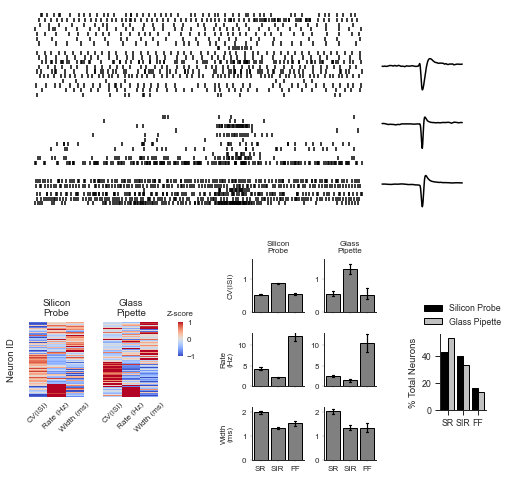

In [450]:
from drn_interactions.io import load_waveforms

df_meta = load_derived_generic("neuron_types.csv")
good_neurons = load_derived_generic("waveform_summary.csv")[["neuron_id", "width_basepost"]].dropna().neuron_id.unique()
df_meta = df_meta.loc[lambda x: x.neuron_id.isin(good_neurons)]

waveforms = load_waveforms()[["neuron_id", "waveform_index", "waveform_value"]]
session_name = "hamilton_35"

f = plt.figure(figsize=(7, 7), constrained_layout=True)

f_top, f_bottom = f.subfigures(nrows=2, height_ratios=[1, 1], hspace=0.3)

f_raster, f_waveforms = f_top.subfigures(
    ncols=2,
    nrows=1, 
    width_ratios=[0.9, 0.3],
    wspace=0
)

plot_raster(
    f_raster,
    df_neuron_types=df_meta,
    session_name=session_name,
    gs_kwargs=dict(left=0.05, right=1, bottom=0.1, top=0.9),
    t_start=131,
)

plot_waveforms(
    f=f_waveforms, 
    df_neuron_types=df_meta, 
    df_waveforms=waveforms, 
    session_name=session_name,
    idx_to_choose=2,
    )

f_heat, f_bar, f_prop = f_bottom.subfigures(
    ncols=3, 
    width_ratios=[0.5, 0.4, 0.2],
    wspace=0.2
    )

plot_heats(f_heat, df)

plot_props(f_bar, df)

plot_pct(f_prop, df)

plt.savefig("test.png", dpi=300)

In [121]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

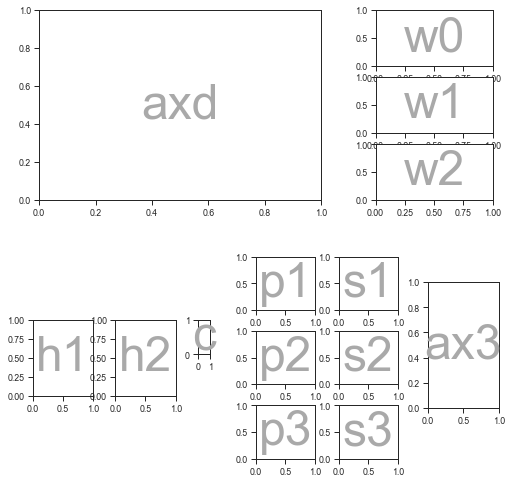

In [189]:
f = plt.figure(figsize=(7, 7))

f_top, f_bottom = f.subfigures(nrows=2, height_ratios=[1, 1], hspace=0.3)

f_raster, f_waveforms = f_top.subfigures(
    ncols=2,
    nrows=1, 
    width_ratios=[0.7, 0.3],
    wspace=0.1)


### Top figure
axd = f_raster.subplots(gridspec_kw=dict(left=0.1))
identify_axes(dict(axd=axd))

axd = f_waveforms.subplots(3, 1)
identify_axes({f"w{i}": axd[i] for i in range(3)})

f_heat, f_bar, f_prop = f_bottom.subfigures(
    ncols=3, 
    width_ratios=[0.5, 0.4, 0.2],
    wspace=0.1)

axd =f_heat.subplot_mosaic(
    [
        ["h1", "h2", "c",],
        ["h1", "h2", ".",],    
    ],
    gridspec_kw=dict(
        width_ratios=[1, 1, 0.2], 
        wspace=0.5, 
        top=0.65,
        bottom=0.35,
        ),
)
identify_axes(axd)

ax2 = f_bar.subplot_mosaic(
    mosaic=[
        ["p1", "s1"],
        ["p2", "s2"],
        ["p3", "s3"],
    ],
    gridspec_kw=dict(
    wspace=0.4,
    hspace=0.4, 
    top=0.9,
    bottom=0.1,
        ),
    )
identify_axes(ax2)

ax3 = f_prop.subplots(gridspec_kw=dict(top=0.8,bottom=0.3, wspace=0.2),)
identify_axes(dict(ax3=ax3))

In [70]:
neuron_type_order = ("SR", "SIR", "FF")

In [71]:
(
    df_meta
    .loc[lambda x: (x.session_name == "hamilton_35")]
    .groupby("neuron_type")
    .apply(len)
    .reindex(neuron_type_order).values
    # height_ratios = prop_of_total(neuron_counts) 
)

array([25, 16, 10], dtype=int64)

In [6]:
from drn_interactions.transforms import SpikesHandler
from drn_interactions.io import load_neurons, load_derived_generic
import matplotlib.pyplot as plt

sh = SpikesHandler(
    block="pre", bin_width=0.1, session_names=["hamilton_35"], t_start=0
)

df = sh.spikes

meta = load_neurons().merge(load_derived_generic("neuron_types.csv"))[["neuron_type", "neuron_id", "session_name"]]

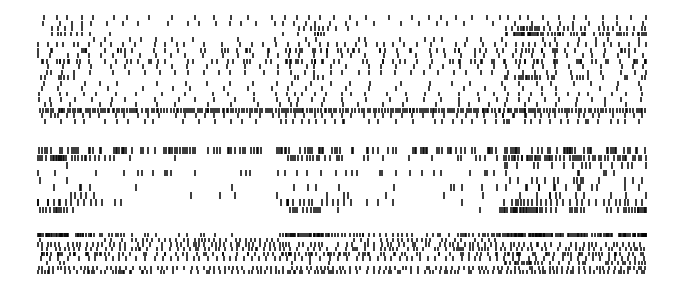

In [7]:
from drn_interactions.stats import prop_of_total
import numpy as np

t_start=120
t_stop= t_start + 10

CLUSTERS_ORDER = ["sr", "sir", "ff"]

neuron_counts = meta.loc[lambda x: (x.session_name == "hamilton_35")].groupby("neuron_type").apply(len).loc[CLUSTERS_ORDER].values
height_ratios = prop_of_total(neuron_counts) 

f = plt.figure(figsize=(12, 5))
gs = f.add_gridspec(3, 1, height_ratios=height_ratios, hspace=0.1)
axes = {}

for i, cluster in enumerate(CLUSTERS_ORDER):
    axes[cluster] = ax = f.add_subplot(gs[i])
    cluster_units = meta.loc[lambda x: (x.session_name == "hamilton_35") & (x.neuron_type == cluster)].neuron_id.unique()
    df1 = df.loc[lambda x: x.neuron_id.isin(cluster_units) & (x.spiketimes >= t_start) & (x.spiketimes <= t_stop)]
    trains = [g["spiketimes"].values for name, g in df1.groupby("neuron_id") if len(g["spiketimes"]) > 15]
    axes[cluster] = ax.eventplot(trains, color="black", linelengths=0.9, linewidths=1.5)
    axes[cluster] = ax.axis("off")
    

In [87]:
neuron_counts

array([25, 16, 10], dtype=int64)

In [88]:
height_ratios

array([0.49019608, 0.31372549, 0.19607843])

In [84]:
?ax.eventplot

Signature:
ax.eventplot(
    positions,
    orientation='horizontal',
    lineoffsets=1,
    linelengths=1,
    linewidths=None,
    colors=None,
    linestyles='solid',
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot identical parallel lines at the given positions.

This type of plot is commonly used in neuroscience for representing
neural events, where it is usually called a spike raster, dot raster,
or raster plot.

However, it is useful in any situation where you wish to show the
timing or position of multiple sets of discrete events, such as the
arrival times of people to a business on each day of the month or the
date of hurricanes each year of the last century.

Parameters
----------
positions : array-like or list of array-like
    A 1D array-like defines the positions of one sequence of events.

    Multiple groups of events may be passed as a list of array-likes.
    Each group can be styled independently by passing lists of values
    to *lineoffsets*, *linelengths*, *l

In [34]:
list(map(lambda x: x.min(), trains))

[440.0, 440.0]

In [37]:
_, ax = plt.subplots(figsize=(10, len(trains) // 5))


ax.eventplot(trains, color="black", linelengths=1.7)
ax.axis("off")

(439.5, 450.5, -1.92, 2.9200000000000004)